In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df.columns.value_counts().sum()

17

In [6]:
df.duplicated().sum()

0

In [7]:
df=df.drop(['url','dish_liked','phone'],axis=1)

### reshaping the Daataset and treating null values 

In [8]:
df.isnull().sum()



address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [10]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
def changes_in_Rats(x):
    if x=='NEW' or x=='-':
        return np.nan
    else:
        x=str(x).split('/')
        x=x[0]
        return float(x)
    

In [13]:
df['rate']=df['rate'].apply(changes_in_Rats)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [14]:
a=df['rate'].mean()
a=round(a,2)
df.rate.fillna(a,inplace=True)
df.rate.unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [15]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [17]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
df['cost'].replace(',',"",regex=True,inplace=True)
df['cost']=df['cost'].astype(dtype='float64')

In [19]:
df.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       51148 non-null  object 
 1   name          51148 non-null  object 
 2   online_order  51148 non-null  bool   
 3   book_table    51148 non-null  bool   
 4   rate          51148 non-null  float64
 5   votes         51148 non-null  int64  
 6   location      51148 non-null  object 
 7   rest_type     51148 non-null  object 
 8   cuisines      51148 non-null  object 
 9   cost          51148 non-null  float64
 10  reviews_list  51148 non-null  object 
 11  menu_item     51148 non-null  object 
 12  type          51148 non-null  object 
 13  city          51148 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 5.2+ MB


## Graphical analysis Dataset

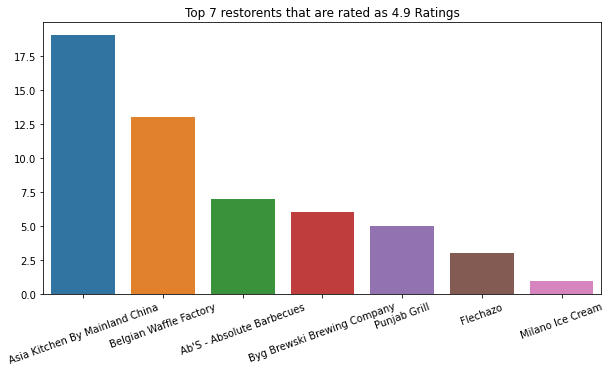

In [22]:
b=df.name.loc[df.rate==4.9].value_counts().values
a=df.name.loc[df.rate==4.9].value_counts().index

plt.figure(figsize=(10,5))
sns.barplot(x=a[:7],y=b[:7])
plt.xticks(rotation=20)
plt.title('Top 7 restorents that are rated as 4.9 Ratings')
plt.show()


### The below bar graph shows the top 7 restorents that are gettig 4.9 getting Rings

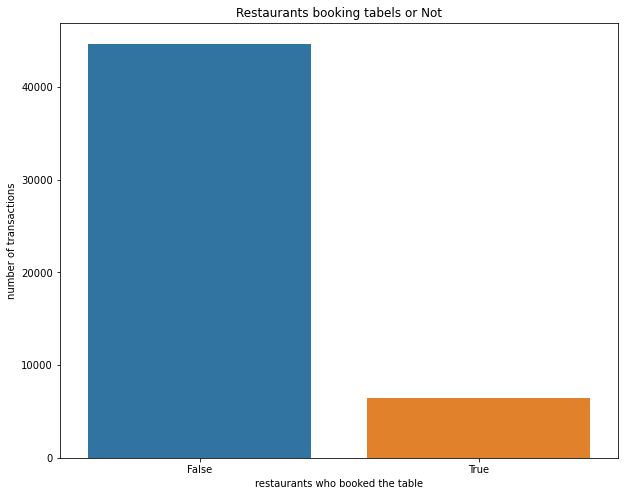

In [23]:
x=df.book_table.value_counts()
y=df.book_table.value_counts().index
plt.figure(figsize=(10,8))
sns.barplot(x=y,y=x)
plt.title("Restaurants booking tabels or Not")
plt.xlabel('restaurants who booked the table')
plt.ylabel('number of transactions')
plt.show()

## the followinotg Data shows that the most of the Restaurants do not have booked facility only 6000 0ut of 23000 costumers had booked a table before they reached the restroents

<function matplotlib.pyplot.show(close=None, block=None)>

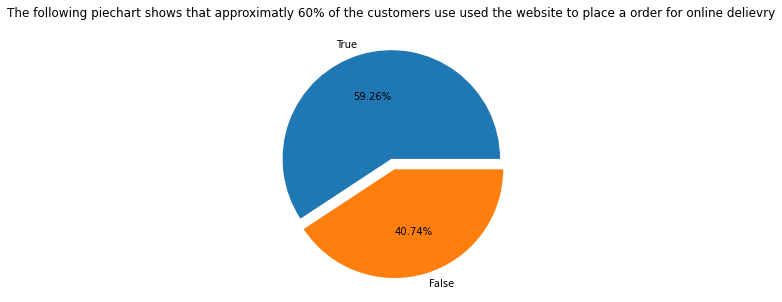

In [24]:
x=df.online_order.value_counts().values
y=df.online_order.value_counts().index
plt.figure(figsize=(5,5))
plt.pie(x,labels=y,autopct='%0.2f%%',explode=(0.0,0.1))
plt.title('The following piechart shows that approximatly 60% of the customers use used the website to place a order for online delievry')
plt.show


In [25]:
plt.rcParams['figure.figsize']=[150,75]

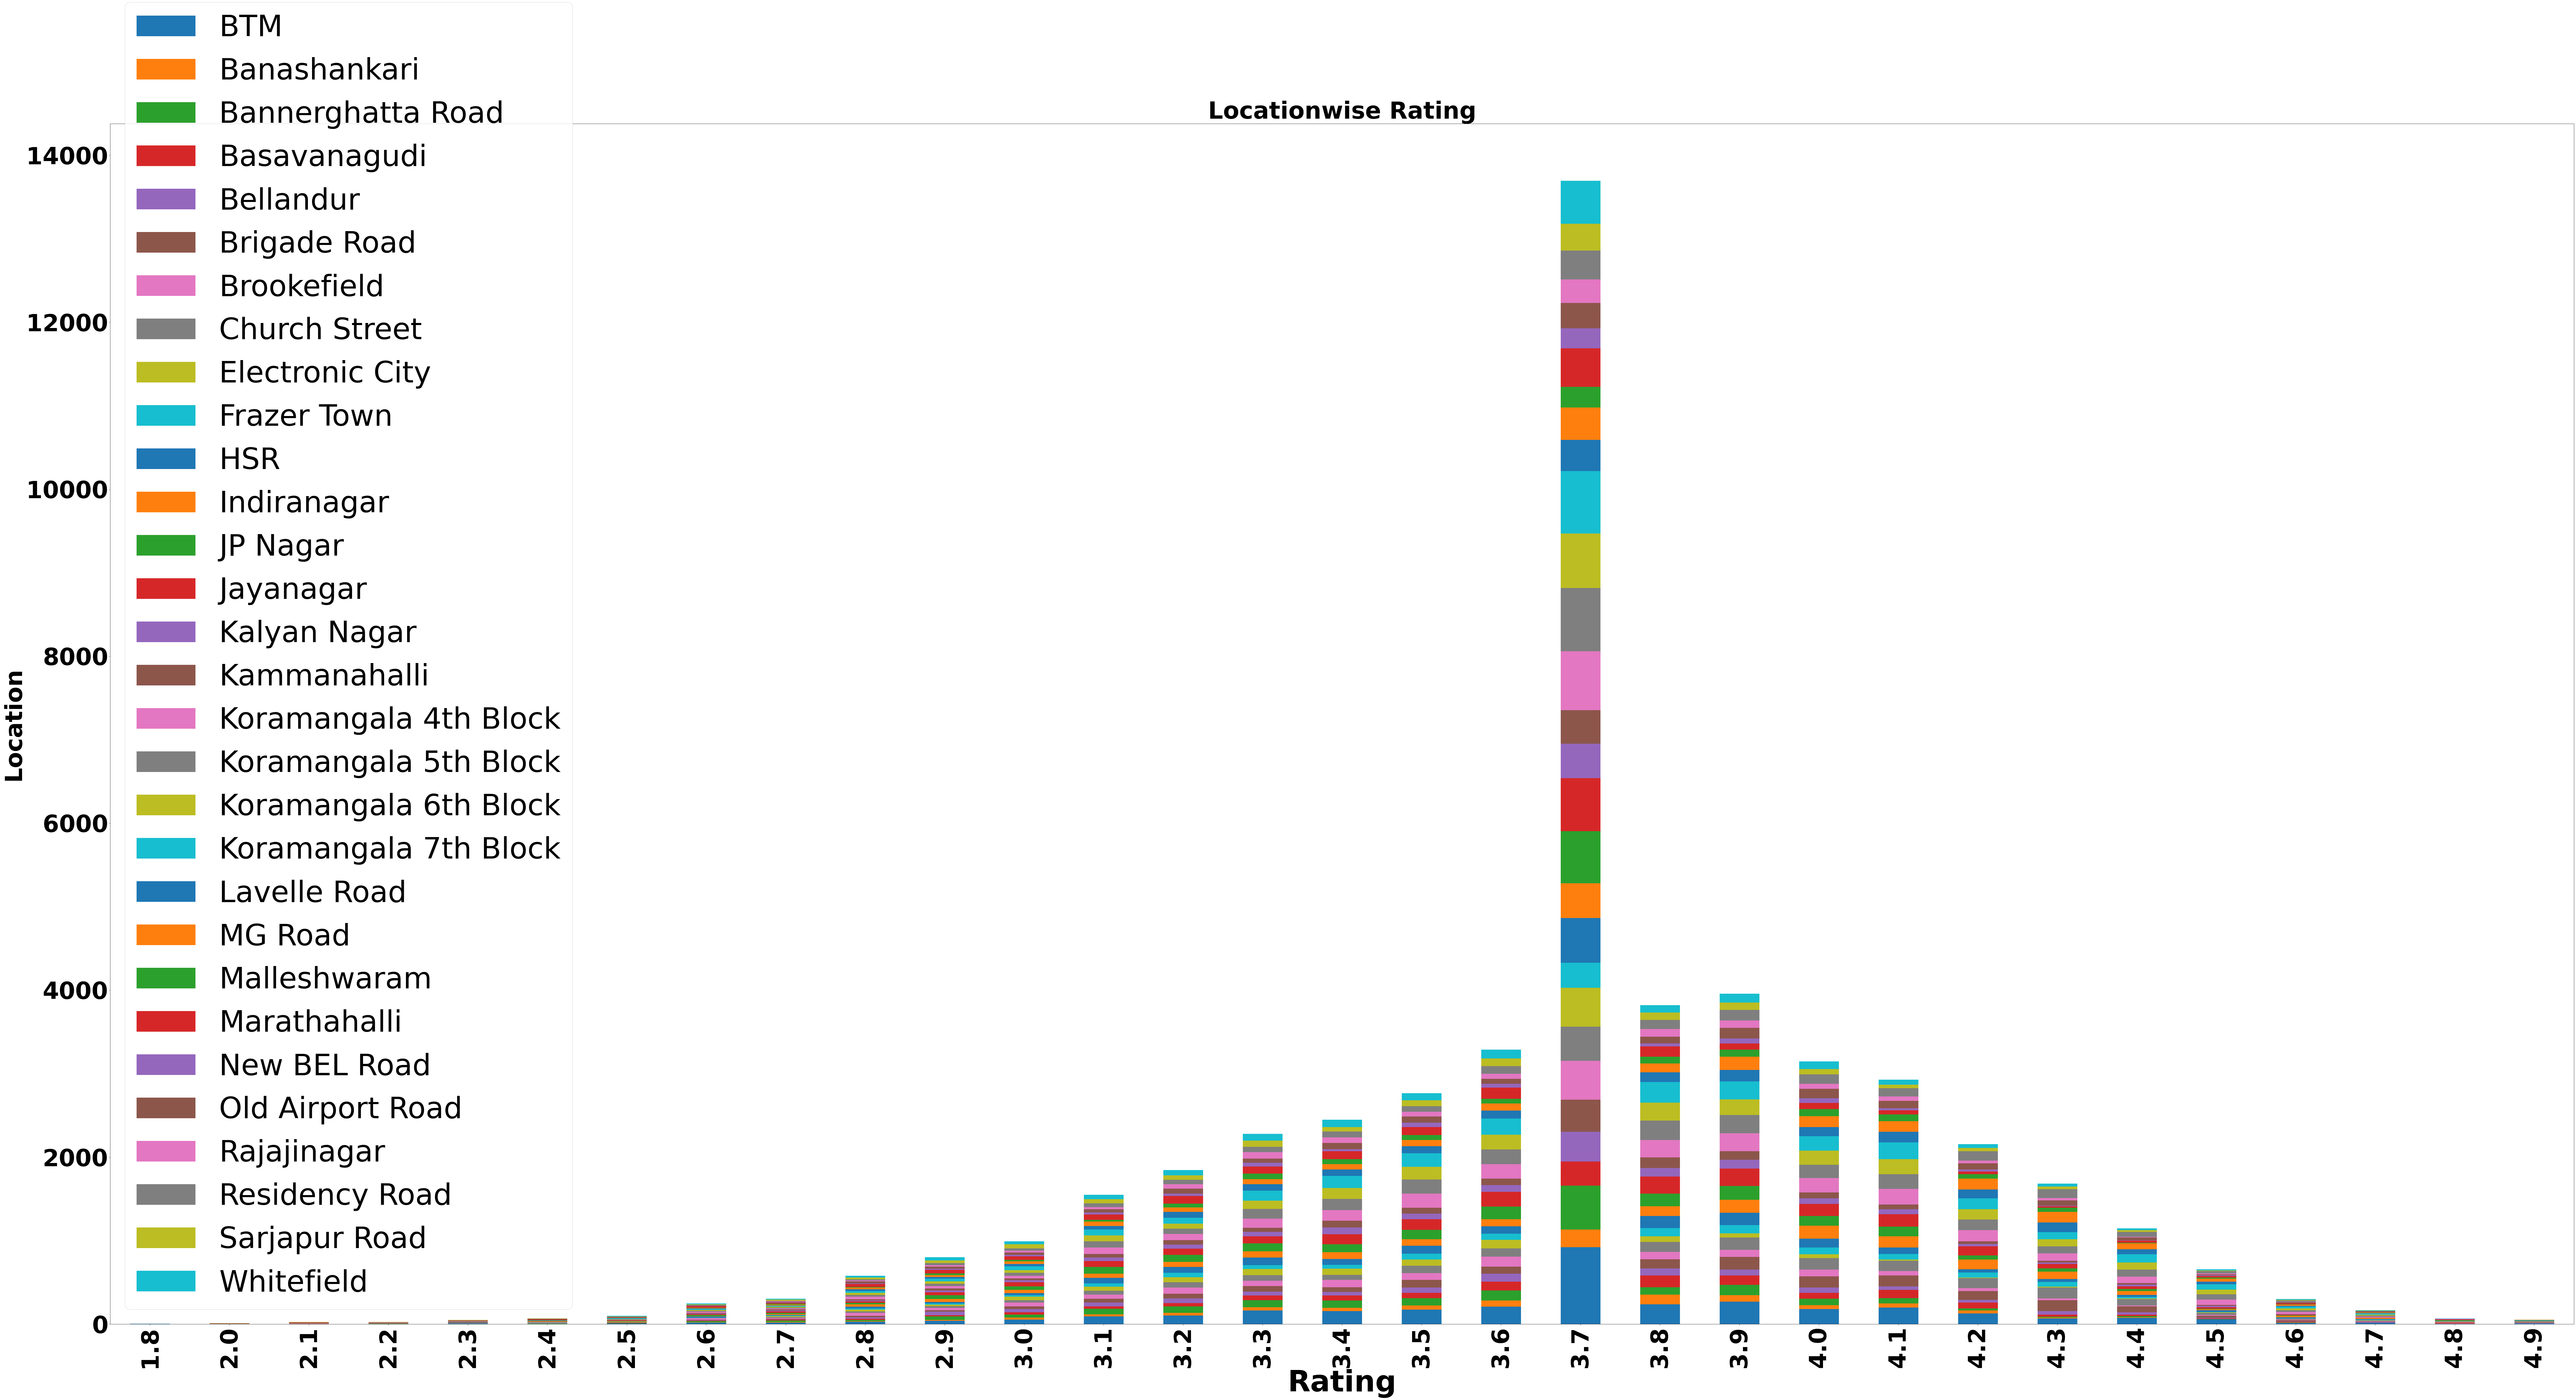

In [26]:
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Locationwise Rating',fontsize=80,fontweight='bold')
plt.ylabel('Location',fontsize=80,fontweight='bold')
plt.xlabel('Rating',fontsize=100,fontweight='bold')
plt.xticks(fontsize=80,fontweight='bold')
plt.yticks(fontsize=80,fontweight='bold')
plt.legend(fontsize=100)

Text(0.5, 1.0, 'Location wise count for restaurants')

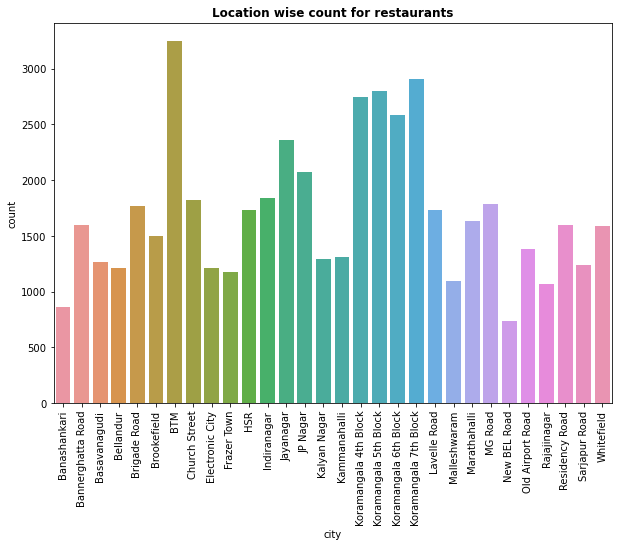

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(df['city'])
sns.countplot(df['city'])
fig = plt.gcf()
plt.xticks(rotation=90)
plt.title('Location wise count for restaurants',fontweight='bold')

### Type of Restaurants

Text(0.5, 1.0, 'Restuarant Type')

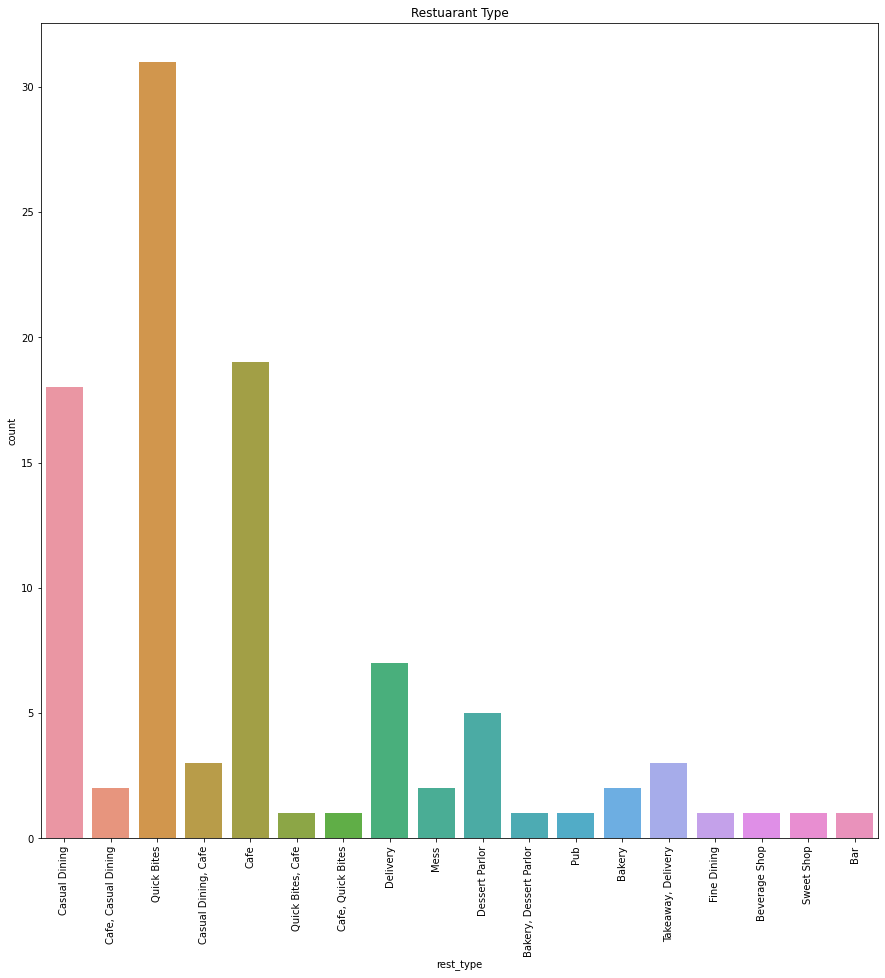

In [28]:
plt.rcParams['figure.figsize']=[10,5]
plt.figure(figsize=(7,5))
sns.countplot(df['rest_type'][:100])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

### The top 10 types of restaurents that are with most number of transactions

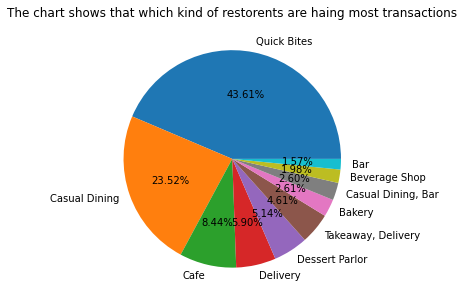

In [29]:
a=df['rest_type'].value_counts().index
b=df['rest_type'].value_counts().values

plt.figure(figsize=(5,5))
plt.pie(b[:10],labels=a[:10],autopct='%0.2f%%')
plt.title('The chart shows that which kind of restorents are haing most transactions')
plt.show()


### Location wise transaction done

In [30]:
city_list=df['location'].value_counts(ascending = False).index[:5]
city_list

Index(['BTM', 'HSR', 'Koramangala 5th Block', 'JP Nagar', 'Whitefield'], dtype='object')

In [32]:
a=df.location.value_counts(ascending=False).values
b=df.location.value_counts(ascending=False).index

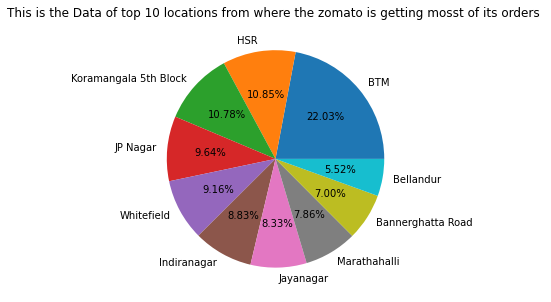

In [35]:
plt.figure(figsize=(5,5))
plt.pie(a[:10],labels=b[:10],autopct='%0.2f%%')#,explode=(0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0))
plt.title('This is the Data of top 10 locations from where the zomato is getting mosst of its orders ')
plt.show()


### This is the Data of top 10 type of food orders that zomato is getting 

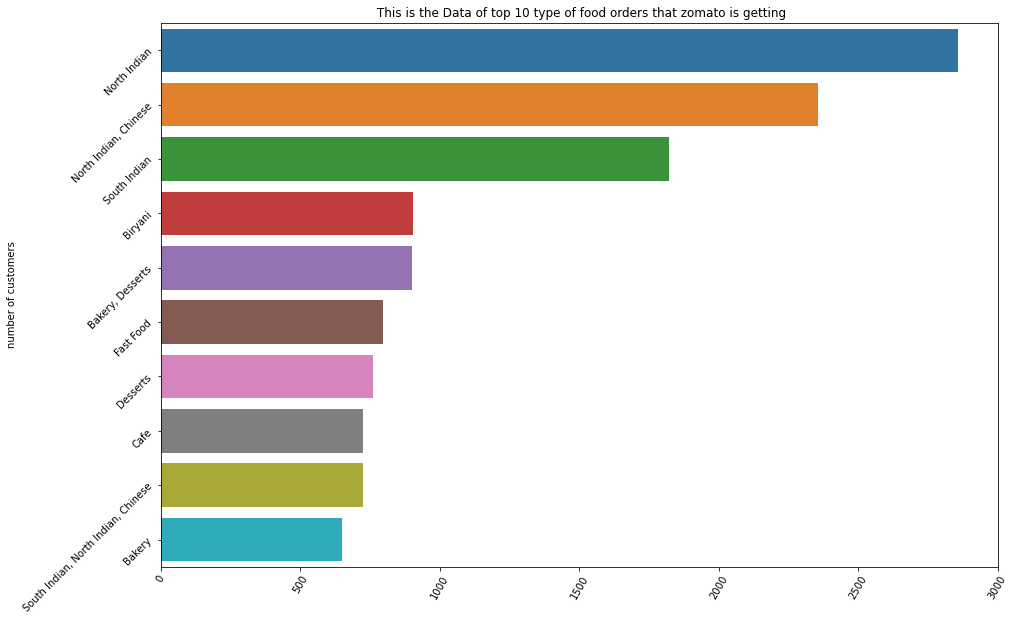

In [36]:
x=df.cuisines.value_counts().values
y=df.cuisines.value_counts().index
plt.figure(figsize=(15,10))
sns.barplot(x=x[:10],y=y[:10])
plt.ylabel('number of customers')
plt.title(' This is the Data of top 10 type of food orders that zomato is getting')
plt.xticks(rotation=60)
plt.yticks(rotation=45)
plt.show()

In [37]:
plt.rcParams['figure.figsize']=[20,10]

### The bar graph is to show that which type of Restuarents are getting how much of Rating

<Figure size 720x360 with 0 Axes>

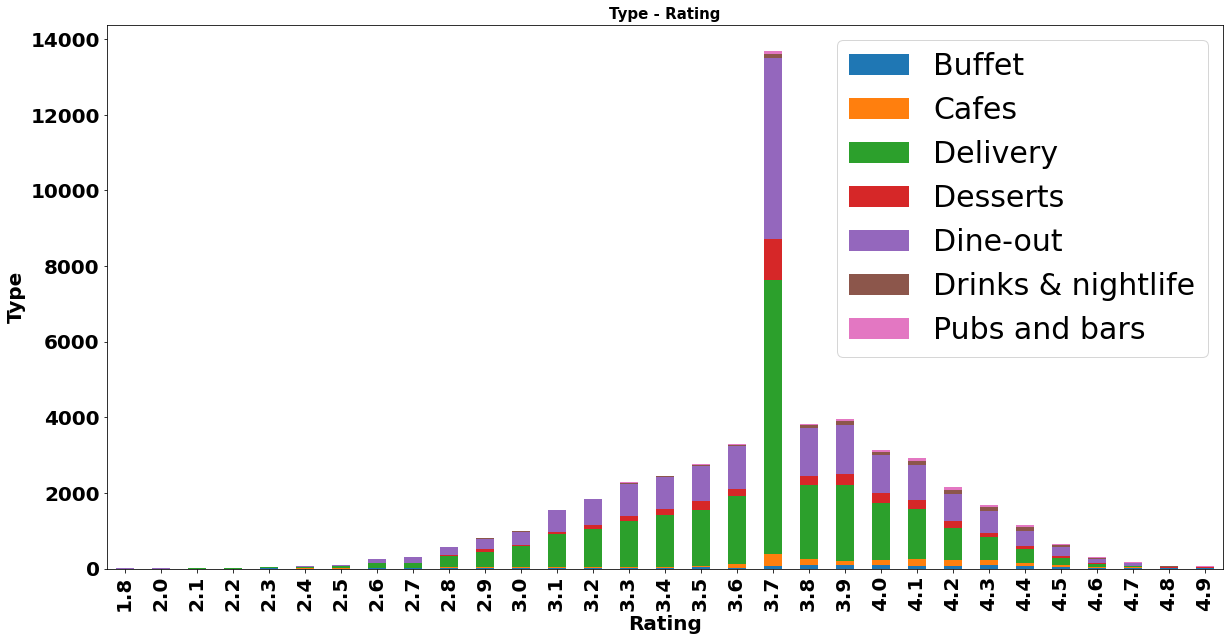

In [38]:
type_plt=pd.crosstab(df['rate'],df['type'])
plt.figure(figsize=(10,5))
type_plt.plot(kind='bar',stacked=True)
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=20,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.legend(fontsize=30)
plt.show()

Text(0.5, 1.0, 'Cost of Restuarant')

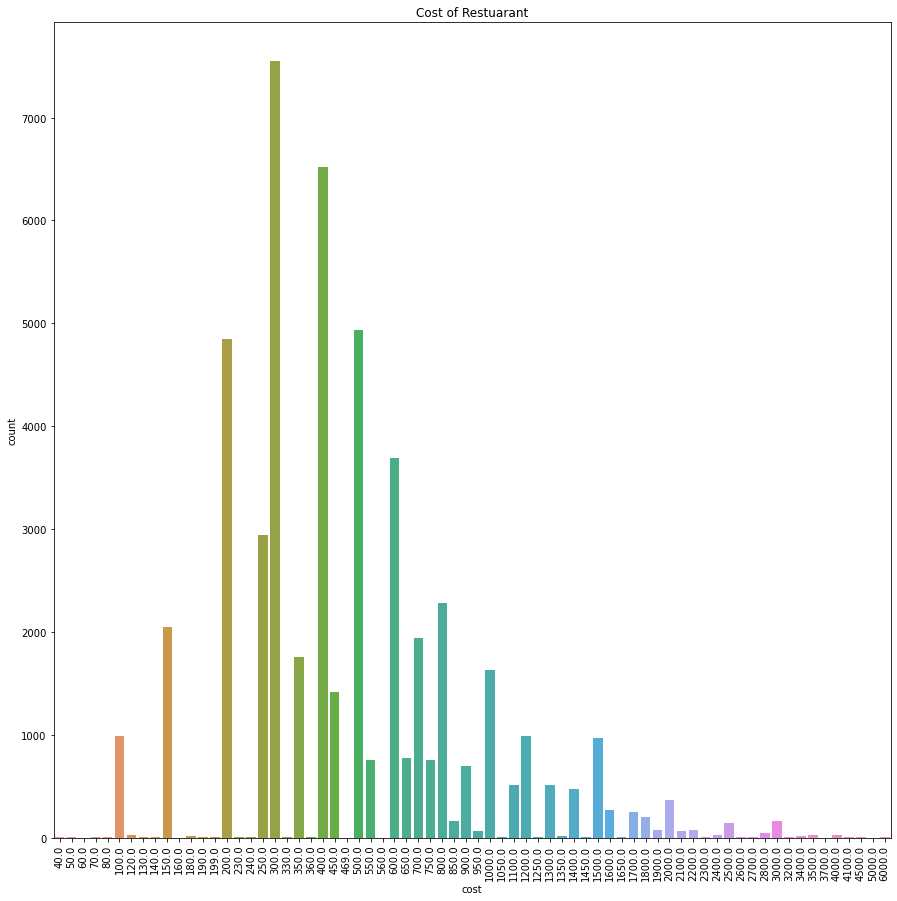

In [39]:
sns.countplot(df['cost'])
sns.countplot(df['cost'])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 0, 'Number of outlets')

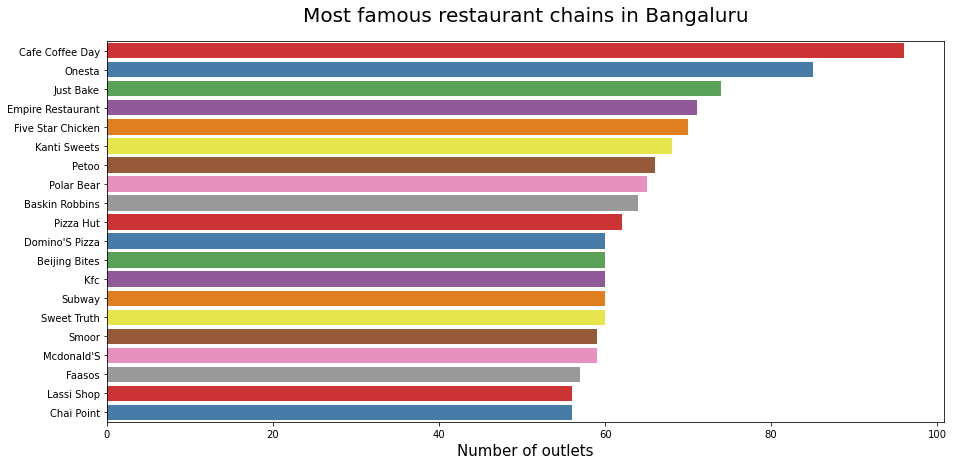

In [40]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [41]:
catcol=df.select_dtypes('object').columns
catcol

Index(['address', 'name', 'location', 'rest_type', 'cuisines', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [42]:
catcol=df.select_dtypes('object').columns
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

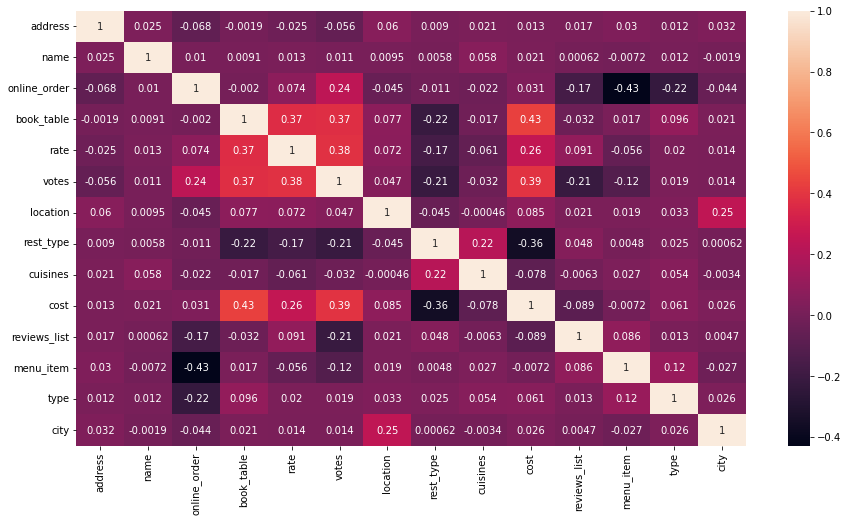

In [43]:
corr1 = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr1, annot=True)
df.columns

###  I skiped thes variables for independent variables becouse these are having negligable value of co-relation with label
'address', 'city', 'name', 'rate', 'reviews_list', 'type'


### Splitting the Dataset


In [44]:
#Defining the independent variables and dependent variables
x = df.iloc[:,[2,3,5,6,7,8,9,11]]
y = df['rate']


In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor()
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9046946598334016